## 유방암 데이터 세트로 이진분류해보기

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

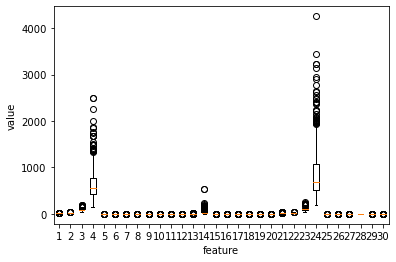

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [6]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [7]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [8]:
x = cancer.data
y = cancer.target

In [9]:
# 훈련 데이터 세트 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
# 결과 확인
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [12]:
# 로지스틱 회귀 구현하기

class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err    # 절편에 대한 그레디언트 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])    # 가중치를 초기화
        self.b = 0                      # 절편을 초기화
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                z = self.forpass(x_i)   # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a)        # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)    # 역방향 계산
                self.w -= w_grad        # 가중치 업데이트
                self.b -= b_grad        # 절편 업데이트

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 선형 함수 적용
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5                          # 계단 함수 적용

In [13]:
# 모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [14]:
# 모델의 정확도 평가
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

## 단일층 신경망 만들기

In [15]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err    # 절편에 대한 그레디언트 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])    # 가중치를 초기화
        self.b = 0                      # 절편을 초기화
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] -a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        return np.array(z) > 0                  # 스텝 함수 계산

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [16]:
# 단일층 신경망 훈련하고 정확도 출력하기
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.7368421052631579

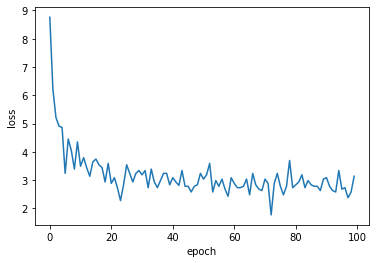

In [17]:
# 손실함수 누적값 확인
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 사이킷런으로 로지스틱 회귀 수행

In [18]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [19]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [20]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## 전처리 하기 

['mean perimeter' 'mean area']


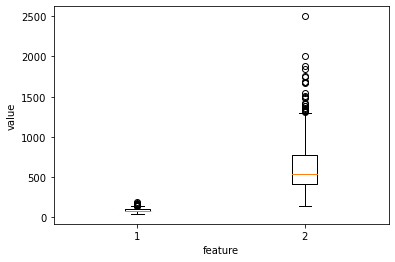

In [21]:
# 훈련 데이터 준비하고 스케일 비교하기
print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [59]:
class SingleLayer:

    # 스케일이 다른 두 특성에 경사 하강법 알고리즘 적용해서 가중치 알아보기 

    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err    # 절편에 대한 그레디언트 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    # 가중치 기록하고 업데이트 양 조절하기
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])    # 가중치 초기화
        self.b = 0                      # 절편 초기화
        self.w_history.append(self.w.copy())    # 가중치 기록
        np.random.seed(42)                      # 무작위로 시드 지정
        for i in range(epochs):
            loss = 0
            # 인덱스를 섞는다.
            indexes = np.random.permutation(np.arange(len(x))) 
            for i in indexes:                   
                z = self.forpass(x[i])      # 정방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)           # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)   # 역방향 계산
                self.w -= self.lr * w_grad                  # 가중치 업데이트(학습률 적용)
                self.b -= b_grad                            # 절편 업데이트
                # 가중치 기록하기
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적한다.
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))

            # epoch마다 평균 손실 저장
            self.losses.append(loss/len(y))
            # 검증 세트에 대한 손실을 계산
            self.update_val_loss(x_val, y_val)

    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
                

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        return np.array(z) > 0                  # 스텝 함수 계산

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [32]:
# 훈련 데이터 세트 나누기
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [33]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

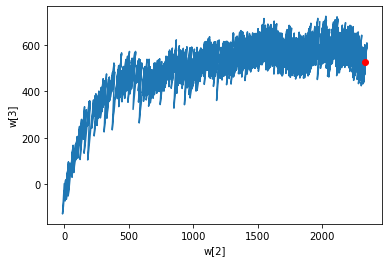

In [34]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

## 스케일을 조정해 모델을 훈련 

In [38]:
# 넘파이로 표준화 구현하기
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

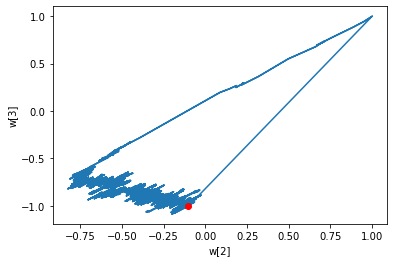

In [51]:
# 모델 훈련하기
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [52]:
layer2.score(x_val, y_val)

0.37362637362637363

In [54]:
# 성능이 좋지 않은 이유는 검증 세트의 스케일을 바꾸지 않았기 때문! 검증 세트도 표준화 처리를 해주자
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

### 스케일을 조정한 다음에 실수하기 쉬운 함정
'훈련 세트와 검증 세트가 다른 비율로 스케일이 조정된 경우' 

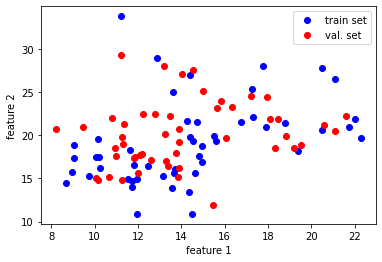

In [55]:
# 1. 원본 훈련 세트와 검증 세트로 산점도 그리기 
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set' ,'val. set'])
plt.show()

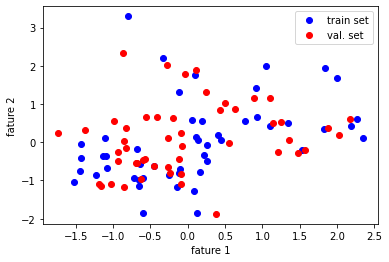

In [56]:
# 2. 전처리한 훈련 세트와 검증 세트로 산점도 그리기
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

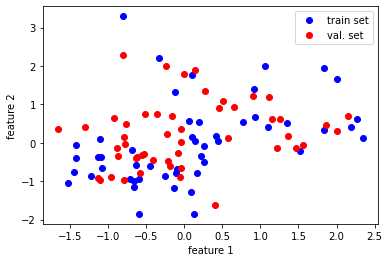

In [57]:
# 3. 올바르기 검증세트 전처리하기
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [58]:
# 모델 평가
layer2.score(x_val_scaled, y_val)

0.967032967032967

In [60]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

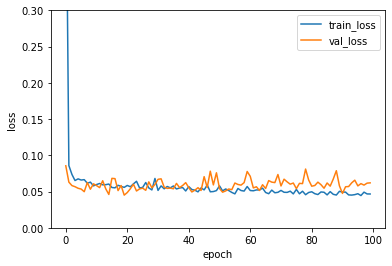

In [61]:
# 손실 값으로 그래프 그려 에포크 횟수 지정
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

20번 에포크 이후에는 훈련할 필요가 없을 것 같다. 

In [62]:
# 훈련 조기 종료 시키기
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

### 과대적합되기 전에 훈련을 멈추었으므로 검증 세트의 성능이 0.967애서 0.978로 조금 더 향상 되었다. 